Variance Inflation Factors:
  feature        VIF
0      RM  16.747965
1     DIS   6.880607
2     TAX  13.861510
3   INDUS   9.598374


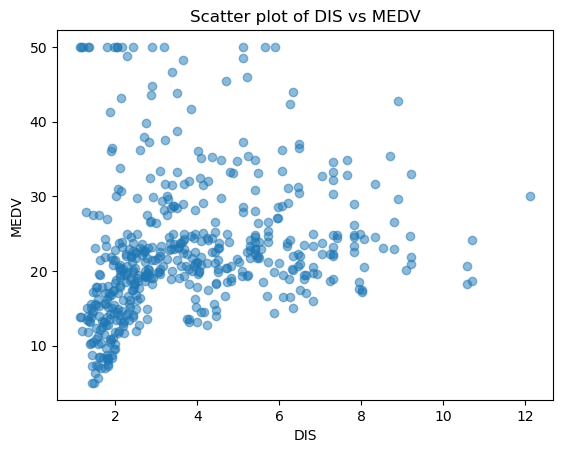

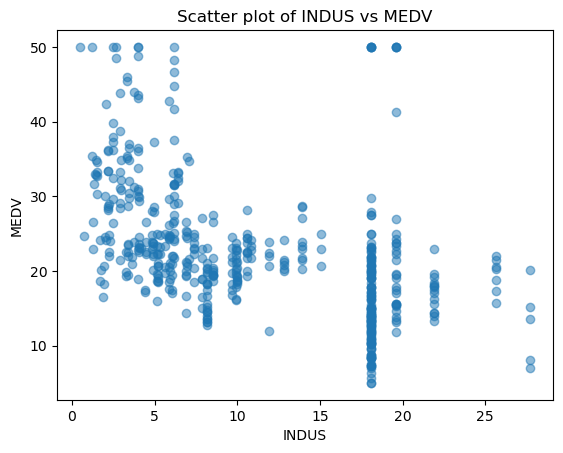

Coefficients: [-0.66966646 -0.76097327]
Intercept: 34.06036823065428
Training Set Evaluation:
Mean Squared Error (MSE): 68.79851347728464
R-squared (R2): 0.21947919382478864
Adjusted R-squared (Adj R2): 0.21483323664517429

Testing Set Evaluation:
Mean Squared Error (MSE): 52.96418122518654
R-squared (R2): 0.3001423737832417
Adjusted R-squared (Adj R2): 0.2916075246830373


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Load the dataset
file_path = 'boston_housing.csv'
df = pd.read_csv(file_path)

# Step 2: Select predictors and target variable
X = df[['RM', 'DIS', 'TAX', 'INDUS']]
y = df['MEDV']

# Step 3: Calculate Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print('Variance Inflation Factors:')
print(vif_data)

# Based on VIF values, finalize the predictors
selected_predictors = vif_data[vif_data['VIF'] < 10]['feature'].tolist()
X_final = X[selected_predictors]

# Step 4: Visualize association with target using scatter plots
for feature in X_final.columns:
    plt.scatter(X_final[feature], y, alpha=0.5)
    plt.title(f'Scatter plot of {feature} vs MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.show()

# Step 5: Split data into train and test sets (67:33 split)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.33, random_state=42)

# Step 6: Build Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Display coefficients and intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Step 8: Evaluate the model
# Training set
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
n = len(y_train)
p = X_train.shape[1]
train_adj_r2 = 1 - (1 - train_r2) * (n - 1) / (n - p - 1)

print('Training Set Evaluation:')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'R-squared (R2): {train_r2}')
print(f'Adjusted R-squared (Adj R2): {train_adj_r2}')

# Testing set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
n = len(y_test)
p = X_test.shape[1]
test_adj_r2 = 1 - (1 - test_r2) * (n - 1) / (n - p - 1)

print('\nTesting Set Evaluation:')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'R-squared (R2): {test_r2}')
print(f'Adjusted R-squared (Adj R2): {test_adj_r2}')
